## Chapter 4 -  Training Models

### Regularised Linear Models

A good way to reduce overfitting is to regularise the model (to constrain it). The fewer degrees of freedom the model has, the harder it will be to overfit the data. As seen earlier, one way to regularise a model is to reduce the number of polynomial degrees.

There are other ways to regularise the model. We can fit a model containing all $p$ predictors using a technique to constraing or regularise the estimates, or shrink the coefficient estimates towards zero. This can significantly reduce the variance. Three ways to do so are Ridge regression, Lasso regression and Elastic Net.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Least Squares Recap

Recall that for least squares, to obtain the parameter estimates, we minimise the cost function, which is the MSE or RSS:

$$\begin{align}J(\Theta) = \text{RSS} (\mathbf X) &= \sum_{i=1}^n \begin{pmatrix} y_i -  \hat{y_i} \end{pmatrix}^2
\\&= \sum_{i=1}^n \begin{pmatrix} y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\end{pmatrix}^2\end{align}$$

Letting $\Theta = \begin{pmatrix}\beta_0, \beta_1, \cdots, \beta_p\end{pmatrix}^T$ and $\mathbf x_i = \begin{pmatrix}1, x_{i1}, \cdots, x_{ip}\end{pmatrix}^T$, then $\text{RSS} = \sum_{i=1}^n \begin{pmatrix} y_i - \Theta\mathbf x_i\end{pmatrix}^2$

#### Ridge Regression

Ridge regression modifies the cost function by adding a penalty term: 

$$\lambda \sum_{j=1}^p \beta^2_j$$

and the RSS now becomes:

$$\begin{align}J(\Theta) 
&= \sum_{i=1}^n\begin{pmatrix} y_i - \hat{y_i} \end{pmatrix}^2 + \lambda \sum_{j=1}^p \beta^2_j\\
&= \sum_{i=1}^n \begin{pmatrix} y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\end{pmatrix}^2 + \lambda \sum_{j=1}^p\beta^2_j\\
&= \sum_{i=1}^n \begin{pmatrix} y_i - \Theta\mathbf x_i\end{pmatrix}^2 + \lambda \sum_{j=1}^p\beta^2_j\\
&= \text{RSS} + \lambda \sum_{j=1}^p\beta^2_j\end{align}$$

The hyperparameter $\lambda$ controls how much to regularise the model. The penalty term $\lambda \sum_{j=1}^p \beta_j^2$ is called the <u>shrinkage penalty</u>. This shrinkage penalty has an effect of shrinking the coefficients towards zero. 

The tuning parameter $\lambda$ controls the relative impact of the terms from the RSS and the shrinkage penalty on the coefficient estimate. 
- When $\lambda=0$, $\lambda \sum_{j=1}^p \beta_j^2=0$. There is no shrinkage effect and the estimates for $\hat{\Theta}$ are optimised at the lowest RSS. This means ridge regression is the same as linear regression.
- As $\lambda$ grows, the shrinkage penalty kicks in. The values of $\beta_j$ starts to shrink. When $\lambda \rightarrow \infty$, the impact of the shrinkage penalty becomes very large, causing the ridge regression coefficient estimates to shrink zero. Consequently, different values of $\lambda$ will produce different $\hat{\Theta}$ estimates and the ideal $\lambda$ can be found using cross-validation. Note that the bias term $\beta_0$ is not regularized. 

Before applying ridge regression, it is ideal to standardize the predictors before performing any model fitting.

In [2]:
# Generate y = 4X with noise
m = 100
X = np.random.normal(30,10,m).flatten()
X_b = np.c_[np.ones((m,1)), X]
y = 4*X + np.random.normal(0,25,m).flatten()
df_Xy = pd.DataFrame({'X' : X, 'y' : y})

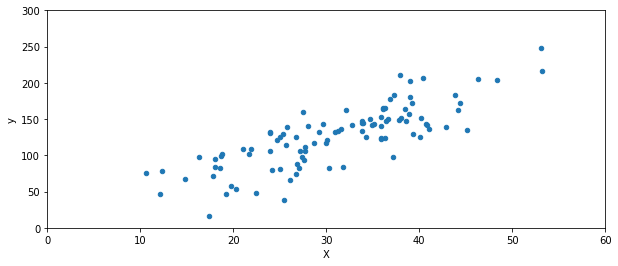

In [3]:
fig, ax = plt.subplots(figsize=(10,4))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax)
ax.set_xlim(0,60)
ax.set_ylim(0,300)
plt.show()

In [4]:
# Test the model using new X_test
lin_X = np.linspace(X.min(), X.max(),m)
print(y.mean())

126.72999947464523


In [5]:
# Linear Regression
reg1 = LinearRegression()
reg1.fit(X_b, y) # Train
print(reg1.intercept_, reg1.coef_)

7.618618837359307 [0.         3.83369237]


In [6]:
# Ridge with different alpha values
reg2 = Ridge(alpha=10000, solver='cholesky')
reg2.fit(X_b, y)
print(reg2.intercept_, reg2.coef_)

73.56739841053806 [0.         1.71107964]


In [7]:
# Ridge with different alpha values
reg3 = Ridge(alpha=100000, solver='cholesky')
reg3.fit(X_b, y)
print(reg3.intercept_, reg3.coef_)

117.84447742977554 [0.         0.28598743]


In [8]:
lin_X_1 = np.c_[np.ones((m,1)), lin_X]
pred1 = reg1.predict(lin_X_1)
df_results1 = pd.DataFrame({'X' : lin_X, 'y' : pred1})
# print(df_results1.head()) # Test

In [9]:
lin_X_2 = np.c_[np.ones((m,1)), lin_X]
pred2 = reg2.predict(lin_X_2)
df_results2 = pd.DataFrame({'X' : lin_X, 'y' : pred2})
# print(df_results2.head()) # Test

In [10]:
lin_X_3 = np.c_[np.ones((m,1)), lin_X]
pred3 = reg3.predict(lin_X_3)
df_results3 = pd.DataFrame({'X' : lin_X, 'y' : pred3})
# print(df_results3.head()) # Test

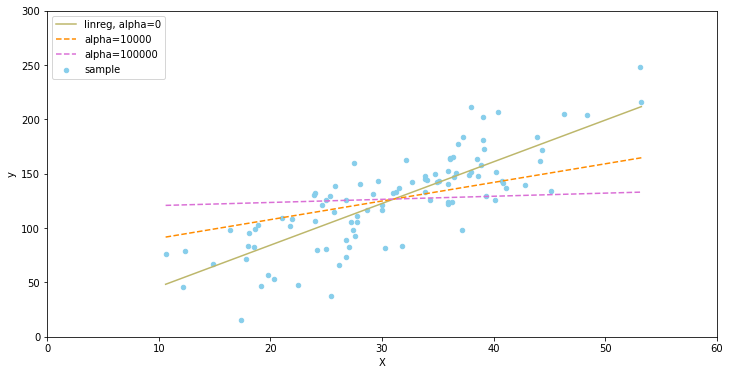

In [11]:
# Plotting for different alpha values. Observe how as alpha increases, the coefficient shrinks.
fig, ax = plt.subplots(figsize=(12,6))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax, color='SKYBLUE')

df_results1.plot(kind='line', x='X', y='y', ax=ax, color='DARKKHAKI')
df_results2.plot(kind='line', x='X', y='y', ax=ax, color='DARKORANGE', style='--')
df_results3.plot(kind='line', x='X', y='y', ax=ax, color='ORCHID', style='--')
ax.legend(['linreg, alpha=0','alpha=10000', 'alpha=100000', 'sample'])
ax.set_xlim(0,60)
ax.set_ylim(0,300)
plt.show()

Ridge regression's advantage over least-squares is due to the bias-variance trade-off. As $\lambda$ increases, the flexibility of the ridge regression decreases, leading to a decrease in variance but increase in bias. 

#### Lasso Regression

Ridge regression still includes all $p$ predictors in the model. The penalty $\lambda \sum \beta_j^2$ will shrink all coefficients towards zero but not set any of them exactly to zero. This can create a challenge in model interpretability. 

We introduce the lasso regression method as a way to overcome this disadvantage. Least Absolute Shrinkage and Selection Operator Regression (Lasso Regression) is another regularized form of Linear Regression. Like Ridge regression, it adds a penalty term, now $\lambda\sum_{j=1}^p |\beta_j|$ to the cost function:

$$\begin{align}J(\Theta) 
&= \sum_{i=1}^n\begin{pmatrix} y_i - \hat{y_i} \end{pmatrix}^2 + \lambda \sum_{j=1}^p |\beta_j|\\
&= \sum_{i=1}^n \begin{pmatrix} y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\end{pmatrix}^2 + \lambda \sum_{j=1}^p|\beta_j|\\
&= \sum_{i=1}^n \begin{pmatrix} y_i - \Theta\mathbf x_i\end{pmatrix}^2 + \lambda \sum_{j=1}^p|\beta_j|\\
&= \text{RSS} + \lambda \sum_{j=1}^p|\beta_j|\end{align}$$

Consider that ridge regression involves the $\beta_j^2$ term while lasso regression involves the $|\beta_j|$ term. We say that the ridge uses the $l_2$ penalty while the lasso uses the $l_1$ penalty. Recall that the norm is the sum of all vectors in a space. So the $l_1$ norm is simply $\sum_j |\beta_j|$ while the $l_2$ norm is $\sum_j \beta^2_j$

Similar to ridge regression, lasso shrinks the coefficient estimates towards zero. However, the $l_1$ penalty forces some of the coefficient estimates to be exactly equal to zero when $\lambda$ is sufficiently large. So the lasso also performs variable selection. Hence, models from the lasso are generally much easier to interpret than those produced by ridge regression. The lasso yields sparse models, which are models that involve only a subset of the variables.

To select good values for $\lambda$ for both ridge and lasso regression, we use cross-validation.

In [12]:
regb1 = Lasso(alpha=0.1)
regb1.fit(X_b, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
regb2 = Lasso(alpha=100)
regb2.fit(X_b, y)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
lin_X_b1 = np.c_[np.ones((m,1)), lin_X]
predb1 = regb1.predict(lin_X_b1)
df_resultsb1 = pd.DataFrame({'X' : lin_X, 'y' : predb1})

predb2 = regb2.predict(lin_X_b1)
df_resultsb2 = pd.DataFrame({'X' : lin_X, 'y' : predb2})

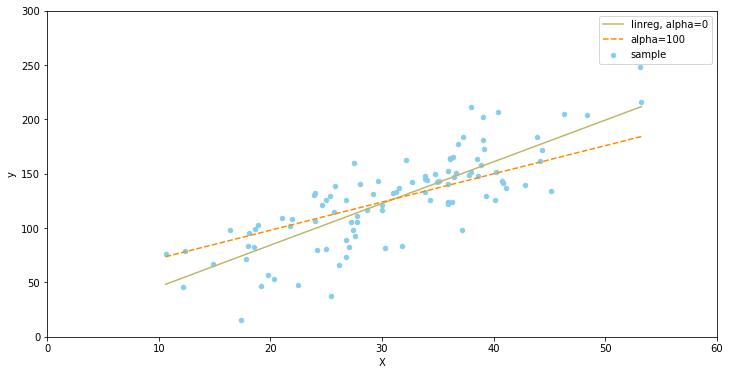

In [15]:
# Plotting for different alpha values. Observe how as alpha increases, the coefficient shrinks.
fig, ax = plt.subplots(figsize=(12,6))
df_Xy.plot(kind='scatter', x='X', y='y', ax=ax, color='SKYBLUE')

df_results1.plot(kind='line', x='X', y='y', ax=ax, color='DARKKHAKI')
df_resultsb2.plot(kind='line', x='X', y='y', ax=ax, color='DARKORANGE', style='--')
ax.legend(['linreg, alpha=0','alpha=100', 'sample'])
ax.set_xlim(0,60)
ax.set_ylim(0,300)
plt.show()

#### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularisation term is a mix of the both ridge and lasso regularisation term and you can control the mix ratio $r$. When $r=0$ Elastic net is equivalent to Ridge regression while when $r=1$ then Elastic net is equivalent to Lasso regression:

The cost function , $J(\Theta)$ in terms of RSS is:

$$\begin{align}J(\Theta) &= \text{RSS} + r\lambda \sum_{j=1}^p\beta^2_j + (1-r)\lambda \sum_{j=1}^p|\beta_j|\\&= \sum_{i=1}^n \begin{pmatrix} y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\end{pmatrix}^2 + r\lambda \sum_{j=1}^p\beta^2_j + (1-r)\lambda \sum_{j=1}^p|\beta_j|\end{align}$$

In [16]:
regc1 = ElasticNet(alpha=0.1, l1_ratio=0.5)
regc1.fit(X_b, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)